In [1]:
from src.err_analysis import *

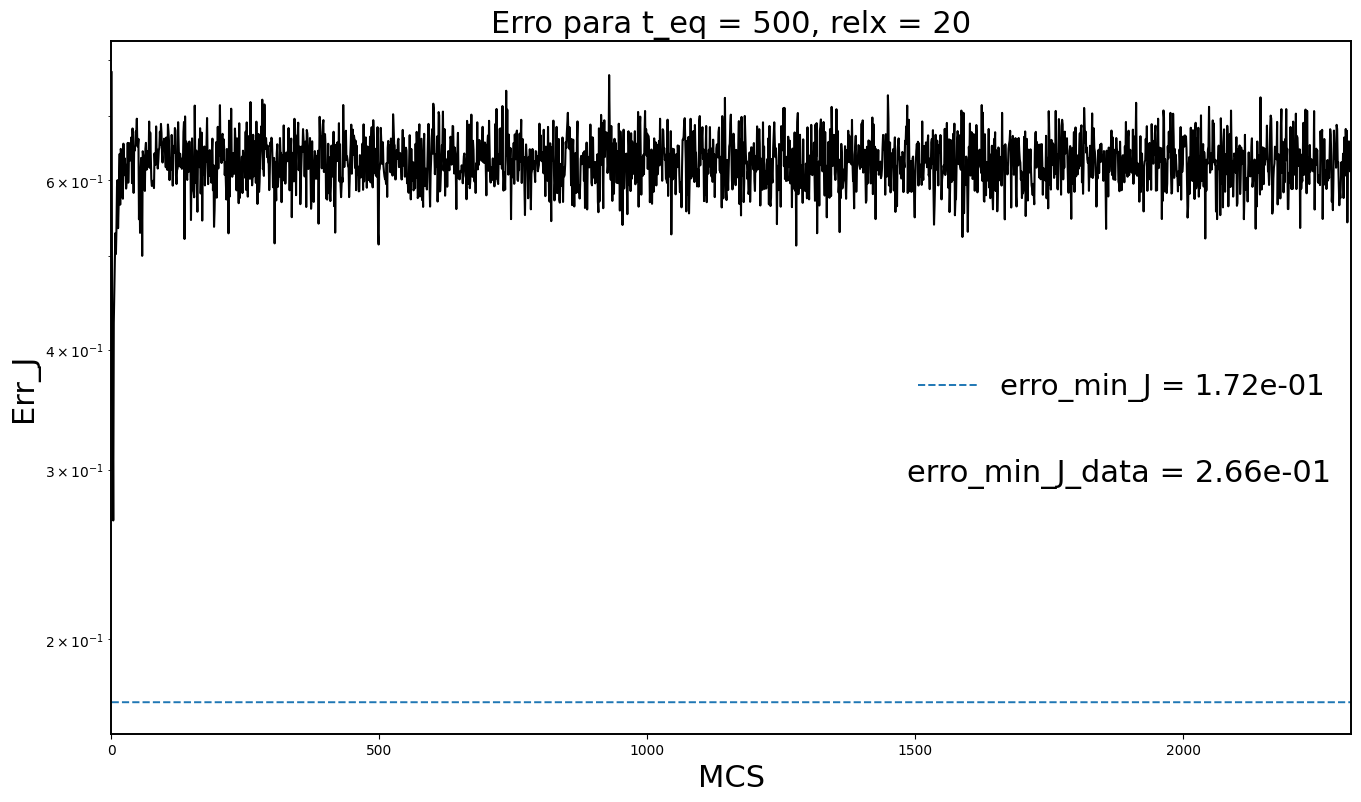

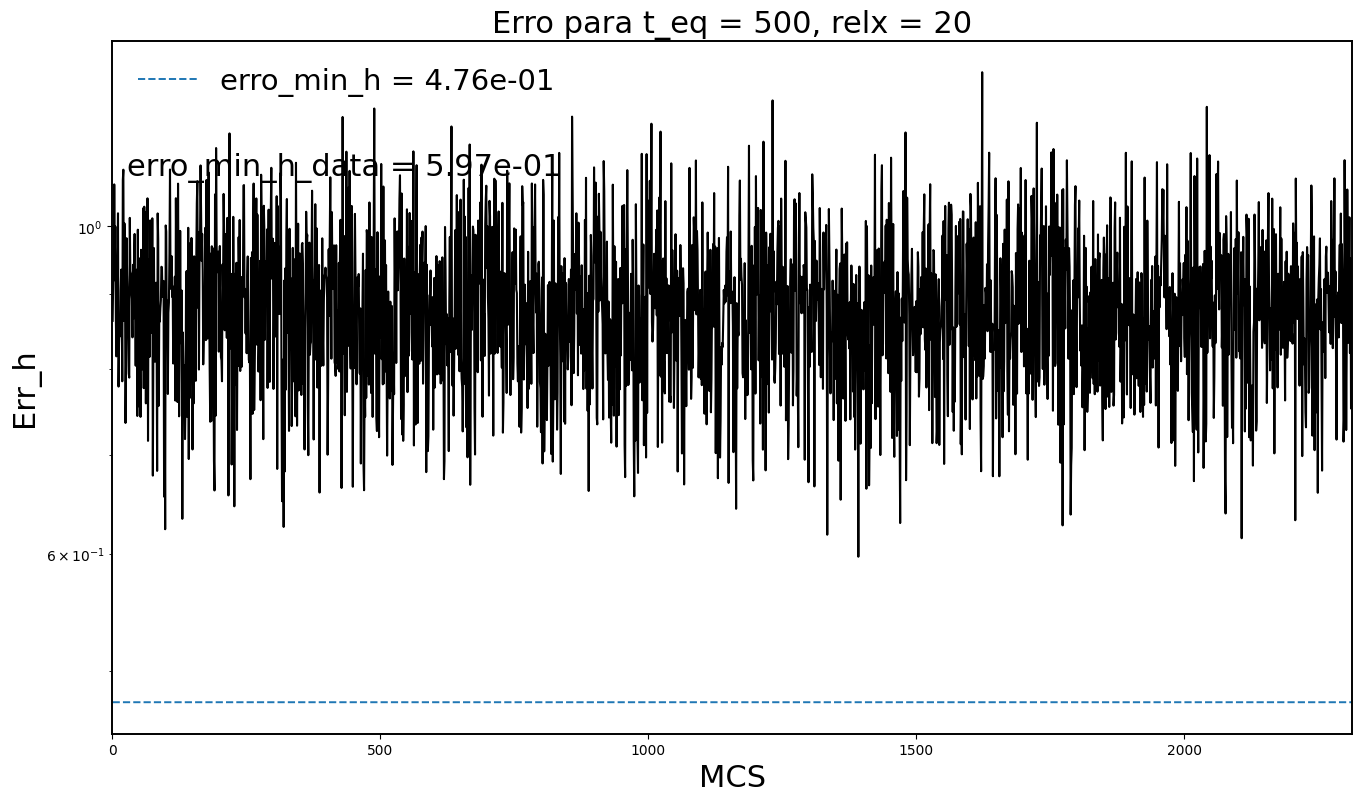

data_min_h = 5.97e-01,data_min_j = 2.66e-01, t_eq = 500, relx =  20


In [19]:
if __name__ == "__main__":
    
    arquivo_selecionado = select_file()
    if arquivo_selecionado:
        mcs_values, erroJ_values, erroh_values = load_data(arquivo_selecionado)
        plotting_graphs2(mcs_values, erroJ_values, erroh_values, arquivo_selecionado)
        
    else:
        print("Nenhum arquivo foi selecionado.")

Press Ctrl+C to stop the real-time plot.


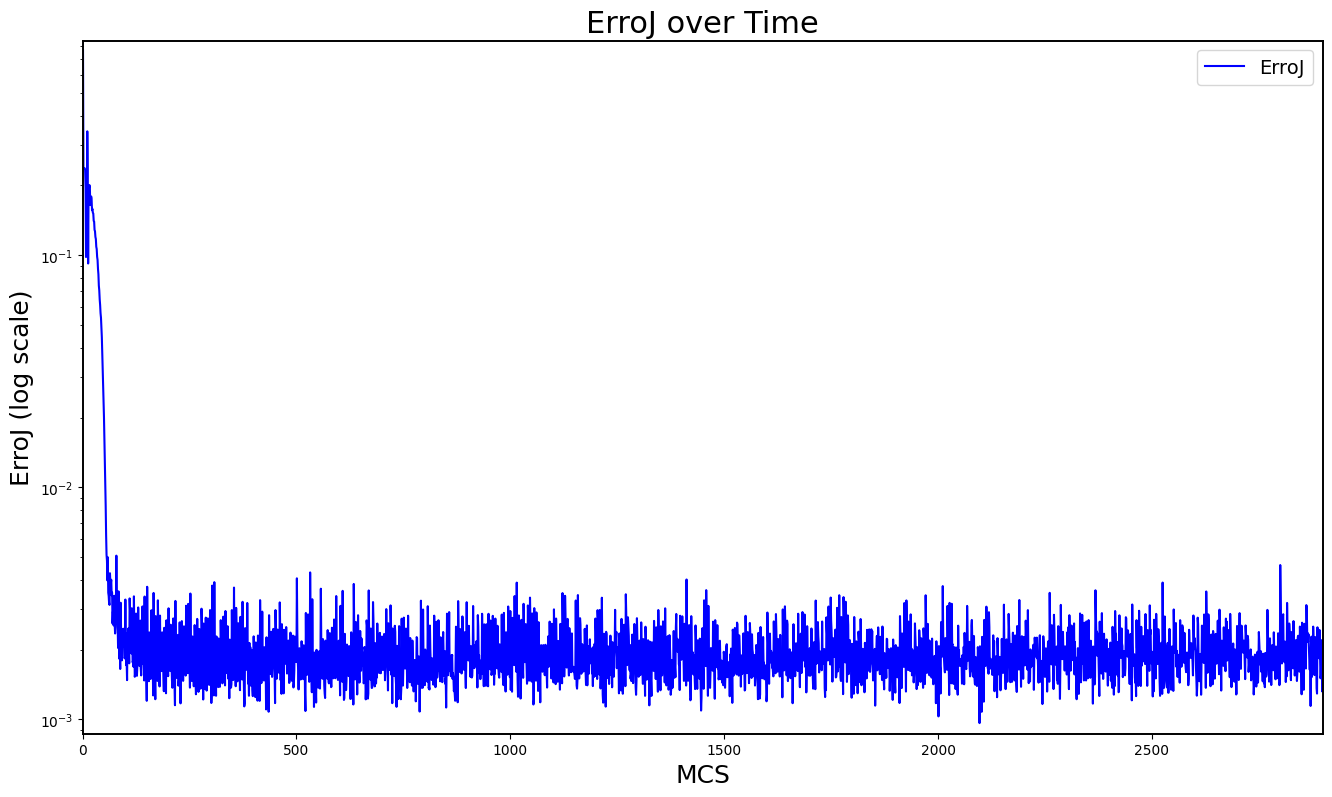

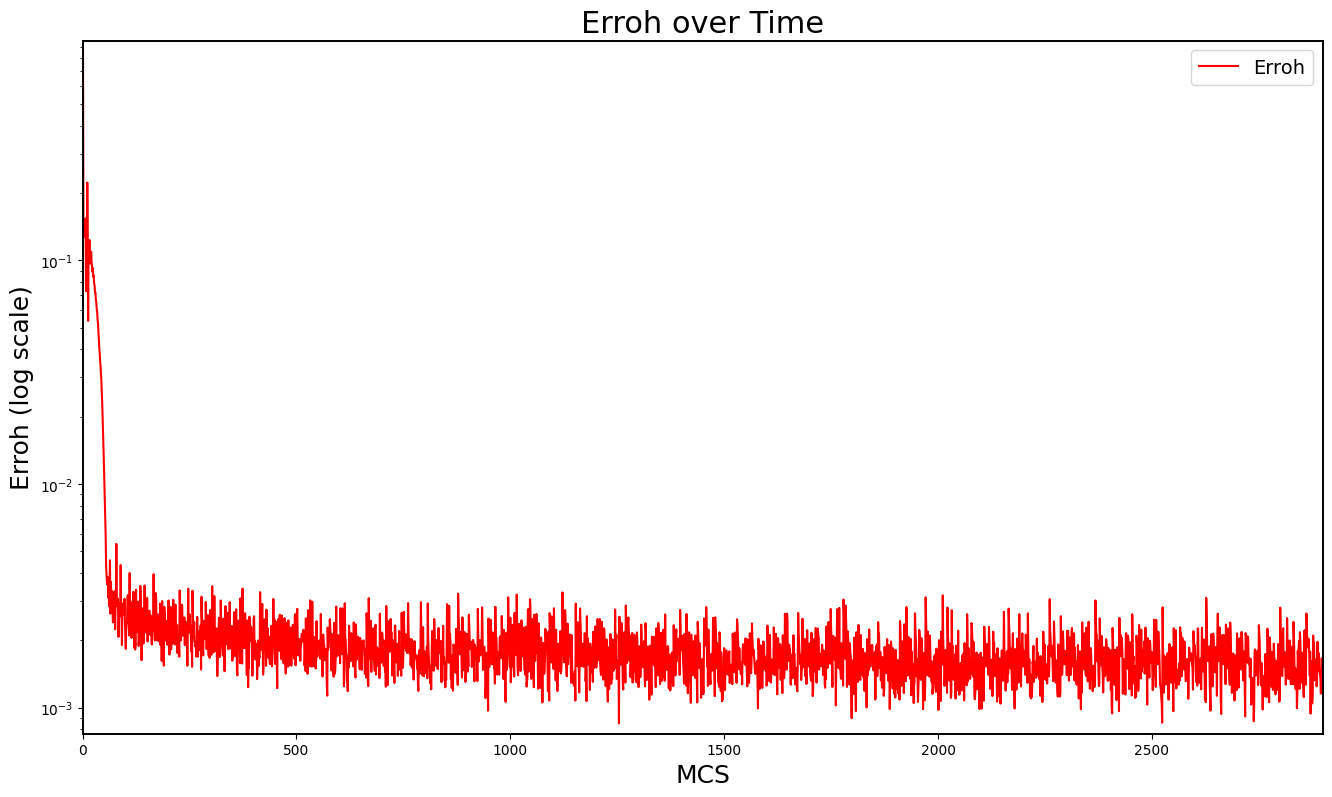

Real-time plot stopped.


In [15]:
if __name__ == "__main__":
    
    arquivo_selecionado = select_file()
    if arquivo_selecionado:
        update_plot(arquivo_selecionado)
        #plotting_graphs2(mcs_values, erroJ_values, erroh_values, arquivo_selecionado)
    else:
        print("Nenhum arquivo foi selecionado.")

Press Ctrl+C to stop the real-time plot.


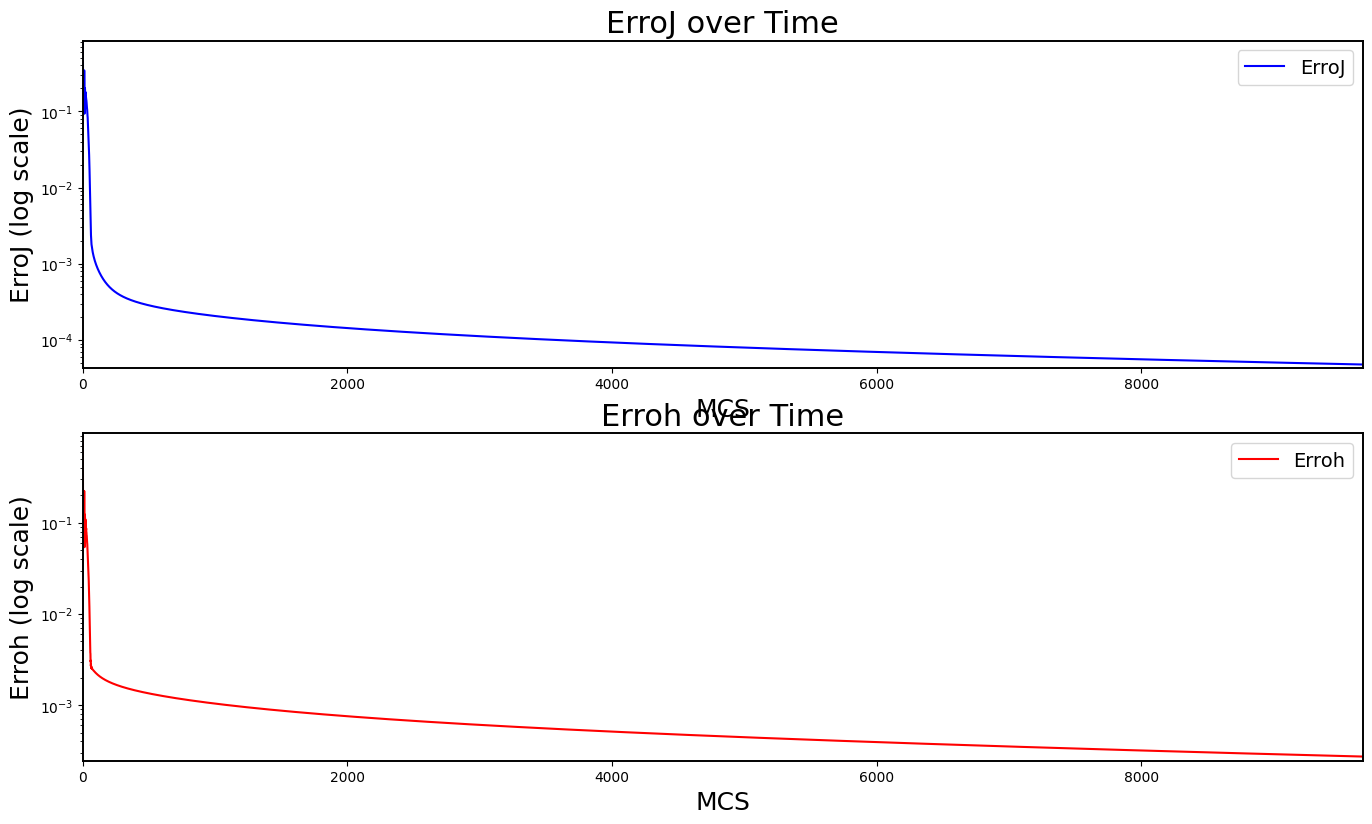

Real-time plot stopped.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

# Path to your file
file_path = "../Results/Erro/erro_sampleN20_err_j_2.00e-05_err_h_2.00e-05_mteq_150_mrelx_2.dat"  # Replace with the actual path

# Function to load the data
def load_data(file):
    try:
        df = pd.read_csv(file, sep=r'\s+', dtype={'inter': int, 'erroJ': float, 'erroh': float})
        return df['inter'], df['erroJ'], df['erroh']
    except Exception as e:
        print(f"Error reading file: {e}")
        return [], [], []

# Initialize the plot
fig, ax = plt.subplots(2, 1, figsize=(16, 9))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Configure each subplot
ax[0].set_title('ErroJ over Time', fontsize=22)
ax[0].set_xlabel('MCS', fontsize=18)
ax[0].set_ylabel('ErroJ (log scale)', fontsize=18)
ax[0].set_yscale('log')


ax[1].set_title('Erroh over Time', fontsize=22)
ax[1].set_xlabel('MCS', fontsize=18)
ax[1].set_ylabel('Erroh (log scale)', fontsize=18)
ax[1].set_yscale('log')


# Initialize the line objects
line1, = ax[0].plot([], [], color='blue', label='ErroJ')
line2, = ax[1].plot([], [], color='red', label='Erroh')

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)

# Function to update the plot
def update_plot():
    inter, erroJ, erroh = load_data(file_path)
    if len(inter) > 0:
        line1.set_data(inter, erroJ)
        line2.set_data(inter, erroh)
        ax[0].set_xlim(0, max(inter))
        ax[1].set_xlim(0, max(inter))
        ax[0].set_ylim(min(erroJ) * 0.9, max(erroJ) * 1.1)
        ax[1].set_ylim(min(erroh) * 0.9, max(erroh) * 1.1)
        plt.pause(1)  # Pause for a moment to allow the plot to refresh

# Real-time plotting loop
print("Press Ctrl+C to stop the real-time plot.")
try:
    while True:
        if os.path.exists(file_path):
            update_plot()
        time.sleep(1)  # Check for updates every second
except KeyboardInterrupt:
    print("Real-time plot stopped.")
    plt.close(fig)

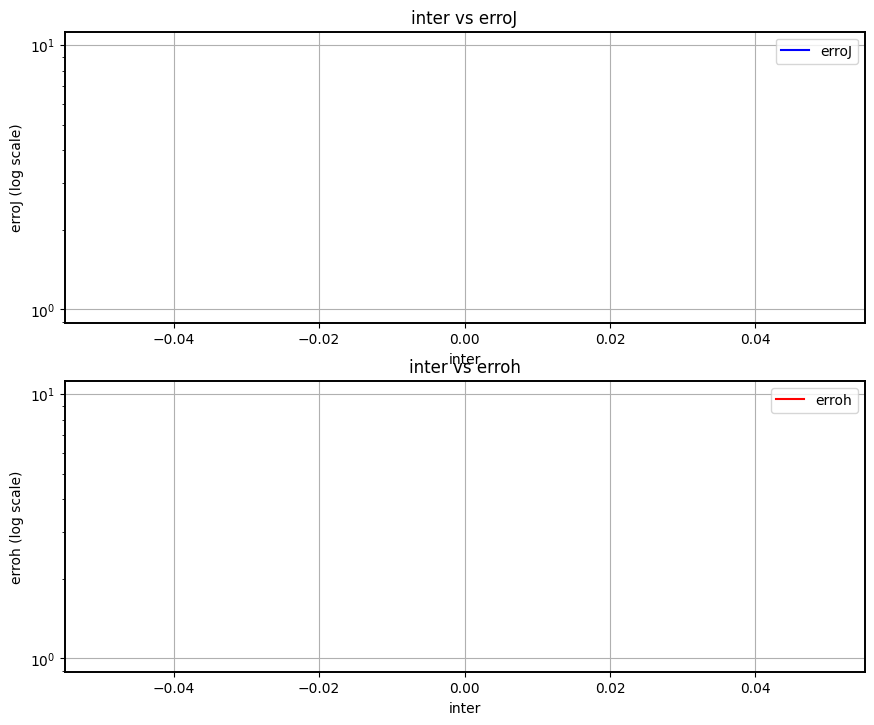

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.ticker as ticker

# Path to your file
file_path = "../Results/Erro/erro_sampleN20_err_j_2.00e-05_err_h_2.00e-05_mteq_150_mrelx_2.dat"  # Replace with the actual path

# Function to load the data
def load_data():
    try:
        # Read the data with proper column types
        return pd.read_csv(file_path, sep=r'\s+', dtype={'inter': int, 'erroJ': float, 'erroh': float})
    except Exception as e:
        print(f"Error reading file: {e}")
        return pd.DataFrame(columns=['inter', 'erroJ', 'erroh'])

# Function to update the plot
def update(frame):
    new_data = load_data()
    if not new_data.empty:  # Check if the file is not empty
        line1.set_data(new_data['inter'], new_data['erroJ'])
        line2.set_data(new_data['inter'], new_data['erroh'])
        ax[0].relim()
        ax[0].autoscale_view()
        ax[1].relim()
        ax[1].autoscale_view()

# Initialize the plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Set y-axis to logarithmic scale
ax[0].set_yscale('log')
ax[1].set_yscale('log')

# Plot inter vs erroJ and inter vs erroh
line1, = ax[0].plot([], [], label='erroJ', color='blue')
ax[0].set_title('inter vs erroJ')
ax[0].set_xlabel('inter')
ax[0].set_ylabel('erroJ (log scale)')
ax[0].legend()
ax[0].grid()

line2, = ax[1].plot([], [], label='erroh', color='red')
ax[1].set_title('inter vs erroh')
ax[1].set_xlabel('inter')
ax[1].set_ylabel('erroh (log scale)')
ax[1].legend()
ax[1].grid()

# Set up real-time update with FuncAnimation
def run_animation():
    global ani  # Ensure ani is a global variable to persist
    ani = FuncAnimation(fig, update, interval=1000, cache_frame_data=False)
    plt.show()

# Call the function to run the animation
run_animation()